## Read images, videos and webcam

Things to note

1. OpenCV in Jupyter notebook needs certain condition such as:
* To show the image in Jupyter notebook we need to use plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


* Originally, OpenCV uses the form of f(B,G,R,A),A for alpha. On the other hand, plt uses RGB color.
2. Generally for cv2, it goes like...
```python
import cv2
img = cv2.imread('resources/lena.png')
cv2.imshow('output', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
```
* waitKey(0) -> wait for any key. 
* waitKey(N) -> disply for N*ms, after which the display will be automatically closed.


* Another way to show an image...
```python
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
```

* **```Application of image from opencv goes like (width,height)```**
* **```But general access by array goes like (height,width)```**

### Displaying Image

In [8]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('resources/lena.png')

cv2.imshow('output', img)
cv2.waitKey(0)

#Show the image with matplotlib
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# plt.show()



-1

### Displaying Video

Video is nothing but sequence of images. So we will need to implement it within while loop so that we can go through each frame by one by one.



```python
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
```
*This piece of phrase means that the video closes when 'q' is pressed.*

In [6]:
import cv2

cap = cv2.VideoCapture("resources/Wind turbine.mp4")

while True:
    success, img = cap.read()
    cv2.imshow("Video",img)
#     plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    if cv2.waitKey(1) & 0xFF == ord('q'):
        cv2.destroyAllWindows()
        break

### Displaying webcam

It is very similar to importing a video.
Instead of the file path, we would fill it in with our camera ID
* ID goes like 0,1,2... (in case of laptop with one camera, ID is 0)


In [5]:
import cv2

cap = cv2.VideoCapture(0)
cap.set(3,640) # cv2.CAP_PROP_FRAME_WIDTH == 3
cap.set(4,480)
cap.set(10,100)

while True:
    success, img = cap.read()
    cv2.imshow("Video",img)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        cv2.destroyAllWindows()
        break

**About the cap.set**
```python
cv2.VideoCapture.set(propid,value) -> retval
```
*For more Property ID refer to:*


https://docs.opencv.org/2.4/modules/highgui/doc/reading_and_writing_images_and_video.html#videocapture-get

## Basic Functions

Here we will take a look at different basic functions which are required for various opencv projects :)

### Converting color

-1

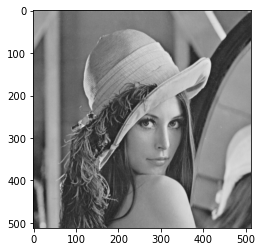

In [2]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("resources/lena.png")

imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(imgGray,cv2.COLOR_BGR2RGB))
# cv2.imshow('Gray',imgGray)
cv2.waitKey(0)

### Blurring

-1

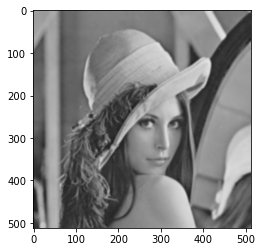

In [1]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("resources/lena.png")

imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
imgBlur = cv2.GaussianBlur(imgGray, (7,7), 0)
plt.imshow(cv2.cvtColor(imgBlur,cv2.COLOR_BGR2RGB))
cv2.waitKey(0)


### Edge detector(Canny)

-1

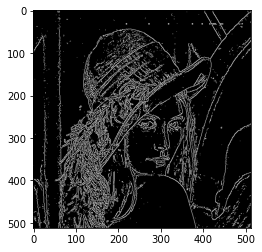

In [5]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("resources/lena.png")

imgCanny = cv2.Canny(img,100,100)
plt.imshow(cv2.cvtColor(imgCanny,cv2.COLOR_BGR2RGB))
cv2.waitKey(0)

-1

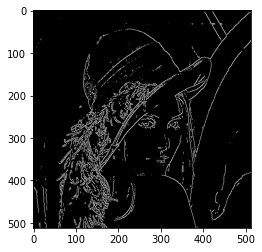

In [6]:
imgCanny = cv2.Canny(img,200,200)
plt.imshow(cv2.cvtColor(imgCanny,cv2.COLOR_BGR2RGB))
cv2.waitKey(0)

*Chaning the threshold1 and threshold2 higher is like reducing the threshold...*

### Dilation

Sometimes we are detecting an edge but since there is a gap or it is not joined properly, it does not detect it as a proper line. 

--> What we can do?  **```We can increase the thickness of our edge```**

-1

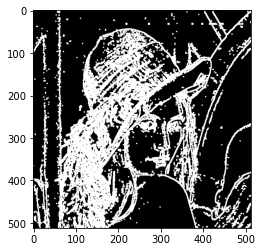

In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("resources/lena.png")
kernel = np.ones((3,3),dtype=np.uint8)

imgCanny = cv2.Canny(img,100,100)
imgDilate = cv2.dilate(imgCanny, kernel, iterations=1)

plt.imshow(cv2.cvtColor(imgDilate,cv2.COLOR_BGR2RGB))


cv2.waitKey(0)


### Erosion

 **```Opposite of Dilation```**

-1

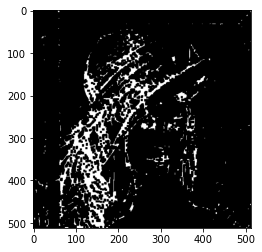

In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("resources/lena.png")
kernel = np.ones((3,3),dtype=np.uint8)

imgCanny = cv2.Canny(img,100,100)
imgDilate = cv2.dilate(imgCanny, kernel, iterations=1)
imgEroded = cv2.erode(imgDilate, kernel, iterations=2)

plt.imshow(cv2.cvtColor(imgEroded,cv2.COLOR_BGR2RGB))


cv2.waitKey(0)

## Resizing and Cropping

### Printing shape and Resizing

```Shape of Image (Height, Width, Channel)```

(1600, 1200, 3)


-1

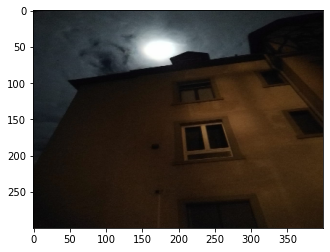

In [17]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('resources/house.jpg')
print(img.shape)

imgResize = cv2.resize(img, (400,300))

# cv2.imshow('resized',imgResize)
plt.imshow(cv2.cvtColor(imgResize,cv2.COLOR_BGR2RGB))
cv2.waitKey(0)

### Cropping

Note that...

* **```Application of image from opencv goes like (width,height)```**
* **```But general access by array goes like (height,width)```**

-1

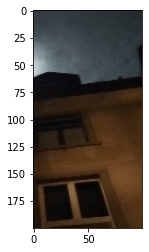

In [19]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('resources/house.jpg')

imgResize = cv2.resize(img, (400,300))
imgCropped = imgResize[0:200,200:300]
# cv2.imshow('resized',img)
plt.imshow(cv2.cvtColor(imgCropped,cv2.COLOR_BGR2RGB))
cv2.waitKey(0)


## Shapes and Texts

Here we will learn:

* How to draw a line on images
* How to draw rectangles, circles on images
* How to put text on images

float64


-1

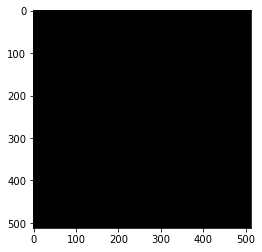

In [20]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = np.zeros([512,512])

img = img.astype(dtype=np.float32)
# cv2.imshow('Image',img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
cv2.waitKey(0)

-1

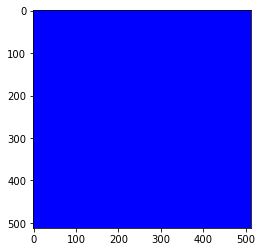

In [16]:

img = np.zeros([512,512,3], dtype=np.uint8)
img[:] = 255,0,0
# cv2.imshow('Image',img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
cv2.waitKey(0)

### Drawing Line

-1

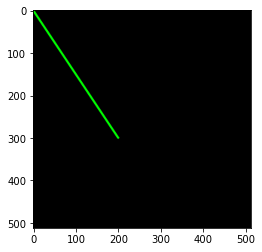

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = np.zeros([512,512,3], dtype=np.uint8)
cv2.line(img = img,
         pt1 = (0,0),
         pt2 = (200,300),
         color= (0,255,0),
         thickness=3)
# cv2.imshow('Image',img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
cv2.waitKey(0)

-1

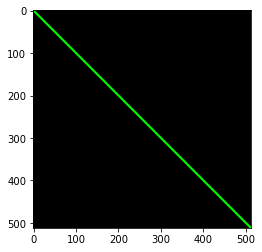

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = np.zeros([512,512,3], dtype=np.uint8)
cv2.line(img = img,
         pt1 = (0,0),
         pt2 = (img.shape[1] ,img.shape[0]),
         color= (0,255,0),
         thickness=3)
# cv2.imshow('Image',img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
cv2.waitKey(0)

### Drawing rectangle

-1

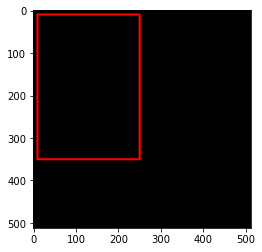

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = np.zeros([512,512,3], dtype=np.uint8)
cv2.rectangle(img = img,
              pt1 = (10,10),
              pt2 = (250,350),
              color = (0,0,255),
              thickness=3)
# cv2.rectangle(img, (0,0), (250,350),(0,0,255), cv2.FILLED)
# cv2.imshow('Rectangle',img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
cv2.waitKey(0)


### Drawing circle

-1

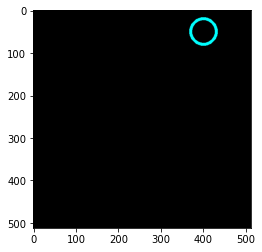

In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = np.zeros([512,512,3], dtype=np.uint8)

cv2.circle(img = img,
           center = (400,50),
           radius = 30,
           color = (255,255,0),
           thickness = 5)
# cv2.imshow('Circle',img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
cv2.waitKey(0)

### Putting text

-1

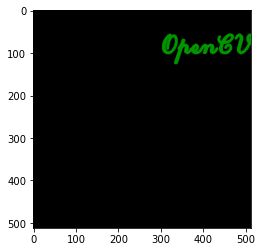

In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = np.zeros([512,512,3], dtype=np.uint8)

cv2.putText(img = img,
            text = "OpenCV",
            org = (300,100),
            fontFace = cv2.FONT_HERSHEY_SCRIPT_COMPLEX,
            fontScale = 2,
            color = (0,150,0),
            thickness = 5) 
# cv2.imshow('text added',img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
cv2.waitKey(0)

## Warp Perspective

It is a part of `perspective transformation`. It transforms certain part of the image 
so that we can get different perspective of the part.

-1

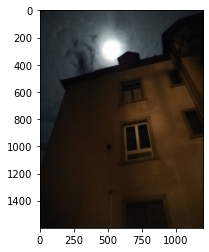

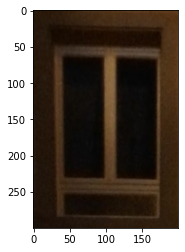

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('resources/house.jpg')

width, height = 200, 300
# Points were manually acquired by opening image with paint app 
lt = [582, 820]
rt = [803, 773]
lb = [581, 1136]
rb = [871, 1087]
pts1 = np.float32([lt, rt, lb, rb])
pts2 = np.float32([[0,0], [width,0], [0,height], [width,height]])

matrix = cv2.getPerspectiveTransform(src = pts1,
                                     dst = pts2) # transformation matrix
imgOutput = cv2.warpPerspective(src = img,
                                M = matrix,
                                dsize = (width,height))

# cv2.imshow('Image',img)
# cv2.imshow('Wrap Perspective',imgOutput)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.figure()
plt.imshow(cv2.cvtColor(imgOutput, cv2.COLOR_BGR2RGB))
cv2.waitKey(0)

## Joining Images

This can be useful when you have lots of images and you run the program again and again which makes it hard to manage all the windows.

*So putting all the windows together*

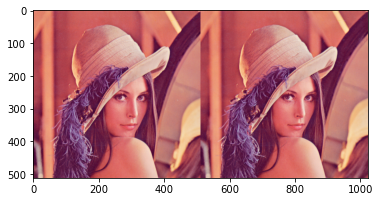

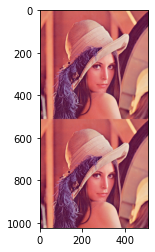

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('resources/lena.png')

imgHor = np.hstack((img,img))
imgVer = np.vstack((img,img))
# cv2.imshow("Horizontal", imgHor)
plt.imshow(cv2.cvtColor(imgHor,cv2.COLOR_BGR2RGB))
# cv2.imshow("Vertical", imgVer)
plt.figure()
plt.imshow(cv2.cvtColor(imgVer,cv2.COLOR_BGR2RGB))
if cv2.waitKey(0)==27:
    cv2.destroyAllWindows()

Wait, there are some issues with this method:
    
  * We cannot resize the image, it comes as it is.
  * If the images do not have same channel ( (ex) RGB and Gray etc. ), it will not work.

We can use the following function 

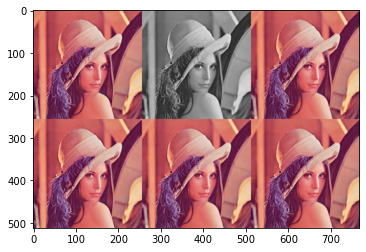

In [24]:
def stackImages(scale,imgArray):
    rows = len(imgArray)
    cols = len(imgArray[0])
    rowsAvailable = isinstance(imgArray[0], list)
    width = imgArray[0][0].shape[1]
    height = imgArray[0][0].shape[0]
    if rowsAvailable:
        for x in range ( 0, rows):
            for y in range(0, cols):
                if imgArray[x][y].shape[:2] == imgArray[0][0].shape [:2]:
                    imgArray[x][y] = cv2.resize(imgArray[x][y], (0, 0), None, scale, scale)
                else:
                    imgArray[x][y] = cv2.resize(imgArray[x][y], (imgArray[0][0].shape[1], imgArray[0][0].shape[0]), None, scale, scale)
                if len(imgArray[x][y].shape) == 2: imgArray[x][y]= cv2.cvtColor( imgArray[x][y], cv2.COLOR_GRAY2BGR)
        imageBlank = np.zeros((height, width, 3), np.uint8)
        hor = [imageBlank]*rows
        hor_con = [imageBlank]*rows
        for x in range(0, rows):
            hor[x] = np.hstack(imgArray[x])
        ver = np.vstack(hor)
    else:
        for x in range(0, rows):
            if imgArray[x].shape[:2] == imgArray[0].shape[:2]:
                imgArray[x] = cv2.resize(imgArray[x], (0, 0), None, scale, scale)
            else:
                imgArray[x] = cv2.resize(imgArray[x], (imgArray[0].shape[1], imgArray[0].shape[0]), None,scale, scale)
            if len(imgArray[x].shape) == 2: imgArray[x] = cv2.cvtColor(imgArray[x], cv2.COLOR_GRAY2BGR)
        hor= np.hstack(imgArray)
        ver = hor
    return ver

import cv2
import numpy as np

img = cv2.imread('resources/lena.png')

imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgStack = stackImages(0.5, [[img,imgGray,img],[img,img,img]])

plt.imshow(cv2.cvtColor(imgStack,cv2.COLOR_BGR2RGB))


## Color Detection

Here we will make use of HSV color.


🔥 What is HSL and HSV : https://en.wikipedia.org/wiki/HSL_and_HSV


Intuitive YouTube Video about HSV: https://www.youtube.com/watch?v=Ceur-ARJ4Wc&ab_channel=KhanAcademyLabs


Detecting color? For us to use the ***HSV value, we need to know (hue, saturation, lightness)*** value.
But, we do not have any idea of that. So we are going to introduce something known as ***track bar*** that will help us play around with values in real time so that we can find optimum, min, max values for our color.



* For HSV in OpenCV, Hue range is [0,179], Saturation range is [0,255] and Value range is [0,255]. Different softwares use different scales. So if you are comparing OpenCV values with them, you need to normalize these ranges.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def empty(a):
    pass

cv2.namedWindow(winname = "TrackBars")

cv2.resizeWindow(winname = "TrackBars",
                width = 640,
                height = 240)

cv2.createTrackbar("Hue Min",
                   "TrackBars",
                   85, # initial value
                   179, # maximum hue value (For OpenCV, it is 0-179)
                   empty) # need to define a function which gets called on
cv2.createTrackbar("Hue Max", "TrackBars", 102, 179, empty)
cv2.createTrackbar("Sat Min", "TrackBars", 0, 255, empty)
cv2.createTrackbar("Sat Max", "TrackBars", 35, 255, empty)
cv2.createTrackbar("Val Min", "TrackBars", 142, 255, empty)
cv2.createTrackbar("Val Max", "TrackBars", 255, 255, empty)

while True:
    
    img = cv2.imread('resources/house.jpg')
    img = cv2.resize(img, (600,400))
    imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    h_min = cv2.getTrackbarPos("Hue Min", "TrackBars")
    h_max = cv2.getTrackbarPos("Hue Max", "TrackBars")
    s_min = cv2.getTrackbarPos("Sat Min", "TrackBars")
    s_max = cv2.getTrackbarPos("Sat Max", "TrackBars")
    v_min = cv2.getTrackbarPos("Val Min", "TrackBars")
    v_max = cv2.getTrackbarPos("Val Max", "TrackBars")
    
    
    lower = np.array([h_min,s_min,v_min])
    upper = np.array([h_max,s_max,v_max])
    mask = cv2.inRange(imgHSV, lower, upper)
    imgRes = cv2.bitwise_and(img, img, mask=mask)
    
#     cv2.imshow('Image',img)
#     cv2.imshow('HSV',imgHSV)
#     cv2.imshow('Mast',mask)
#     cv2.imshow('Result',imgRes)
    plt.imshow(cv2.cvtColor(imgRes,cv2.COLOR_BGR2RGB))
    cv2.waitKey(1)
        

## Contours & Shape detection

🔥 Contour in OpenCV:
    
    
https://docs.opencv.org/3.4/d3/d05/tutorial_py_table_of_contents_contours.html

🔥 Thresholding in OpenCV:


https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html

1264.5
8
4035.0
6
4192.5
5
3369.5
4
1687.0
3
2459.0
8
3759.5
4
3367.0
4
4376.0
8
2140.0
3
4865.0
4
2521.5
3
5013.5
4


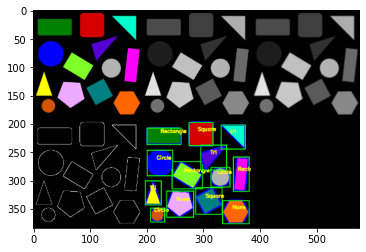

In [5]:
def getContours(original,imgCanny):
    contours, hierarchy = cv2.findContours(imgCanny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    imgContour = original.copy()
    for cnt in contours:
        area = cv2.contourArea(cnt)
        
        if area > 500: # it is good idea to set a threshold so that it does not detect any unnecessary noise
            cv2.drawContours(imgContour, cnt, -1, (255,0,0), 3)
            peri = cv2.arcLength(cnt, True)
            approx = cv2.approxPolyDP(cnt, 0.02*peri, True)
            # print(approx) # printing the coordinate for corner points
            
            objCor = len(approx)
            x, y, w, h = cv2.boundingRect(approx)
            
            
            if objCor ==3: objectType = "Tri"
            elif objCor==4: 
                aspRatio = w/float(h)
                objectType="Square" if aspRatio>0.95 and aspRatio <1.05 else "Rectangle"
            elif objCor>7: objectType="Circle"
            else: objectType="None"
            cv2.rectangle(imgContour, (x, y), (x+w, y+h), (0,255,0), 2)
            cv2.putText(imgContour,
                        objectType,
                        (x+(w//2)-10, y+(h//2)-10),
                        cv2.FONT_HERSHEY_SIMPLEX,
                        0.5,
                        (0,255,255),
                        2)
    return imgContour

from utils.mytool import stackImages,getContours

img = cv2.imread('resources/shapes.png')

imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
imgBlur = cv2.GaussianBlur(imgGray, (7,7), 1)
imgCanny = cv2.Canny(imgBlur, 50,50)
imgBlank = np.zeros_like(img)
imgContour = getContours(img, imgCanny)
imgStack = stackImages(0.6, [[img, imgGray, imgBlur],
                             [imgCanny, imgContour, imgBlank]])


# cv2.imshow('Stack',imgStack)
plt.imshow(cv2.cvtColor(imgStack, cv2.COLOR_BGR2RGB))
if cv2.waitKey(0)==27:
    cv2.destroyAllWindows()


## Face Detection

To detect faces we are going to use a method proposed by **Viola & Jones**. This was one of the earliest method that allowed `real-time object detection`. So if you were to detect faces, we could collect lots of **positives** which will be the *`images of Faces`* and we will also collect lots of **negatives** which will be *`images of anything but faces`*. Using these negatives and positives we will train and create a cascade file that will help us find faces. 

In our case we are not going to train the model but instead we will use a pretent file for faces which is provided by OpenCV
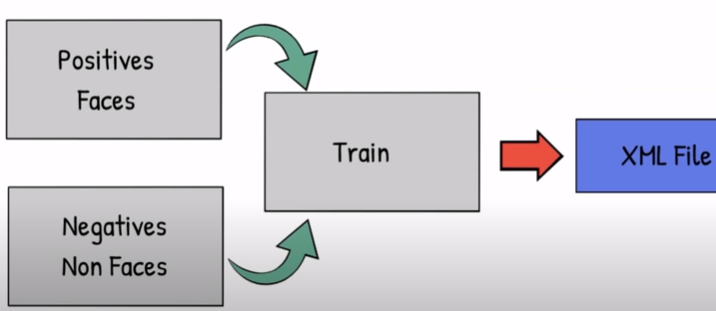

OpenCV provides some default cascades that can detect different stuff such as number plates, eyes, etc.
We will use OpenCV default cascade called *"haarcascade_frontalface_default.xml"

It is not the most accurate one but it is fast. You could also create your own cascade file...


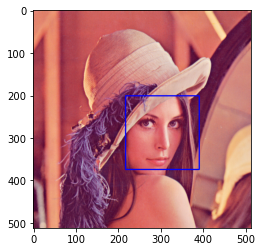

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

faceCascade = cv2.CascadeClassifier("resources/haarcascade_frontalface_default.xml")
img = cv2.imread('resources/lena.png')
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale(imgGray, 1.1, 4)

for (x,y,w,h) in faces:
    cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
if cv2.waitKey(0)==27:
    cv2.destroyAllWindows()